In [2]:
# KNN Classification - Supervised Machine Learning Algorithm used for both classification and regression
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
filename = '/content/pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [ ]:
dataframe

In [ ]:
X

In [6]:
#Apply minmax scaling
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [ ]:
X

In [8]:
num_folds = 10
kfold = KFold(n_splits=10)

In [9]:
model = KNeighborsClassifier(n_neighbors=17)#k=17
results = cross_val_score(model, X, Y, cv=kfold)

In [10]:
results

array([0.67532468, 0.83116883, 0.67532468, 0.67532468, 0.77922078,
       0.77922078, 0.80519481, 0.84415584, 0.72368421, 0.77631579])

In [11]:
print(results.mean())

0.7564935064935066


### Grid Search for Algorithm Tuning

In [12]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [13]:
filename = '/content/pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [14]:
n_neighbors = np.array(range(1,40)) # k=1 to 39
param_grid = dict(n_neighbors=n_neighbors) # used to create a python dictionary called param_grid

In [ ]:
param_grid

In [ ]:
n_neighbors

In [17]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [18]:
print(grid.best_score_)
print(grid.best_params_)

0.7578558696205755
{'n_neighbors': 14}


### Visualizing the CV results

In [ ]:
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 41)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

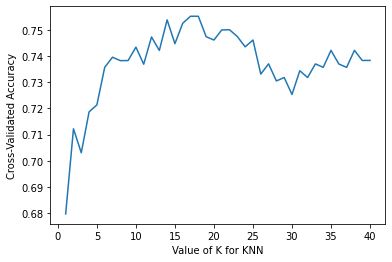

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()